In [1]:
%run forward_simulation.ipynb

In [2]:
tau_uu = uv_body.thruster_input2generalized_Forces()
tau_f_Tc = Function('tau_io', [Tc, thru_u], [tau_uu])

tau_uu.size()

(6, 1)

In [3]:
Ftx = Fsim(sim_x, tau_uu, sim_p)
F_alloc = Function('Vnext_Alloc',[sim_x, thru_u, Tc, sim_p],[Ftx])

In [4]:
# convert principal forces to thruster forces for example
thruster_effort = np.linalg.pinv(blue.thrust_config)@np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

# initial conditions
p0 = np.array([0.0, 0.0, 0.0])
q0 = np.array([0, 0 ,0])
v_b0 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
x0 = vertcat(p0, q0, v_b0)

# example call
F_alloc(x0, thruster_effort, blue.thrust_config, blue.sim_params)

DM([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Loop Simulation with step input

In [5]:
sim = F_alloc.mapaccum(blue.N)

[0.1, -1.73472e-17, 0, 0, 0, -5.20417e-18]


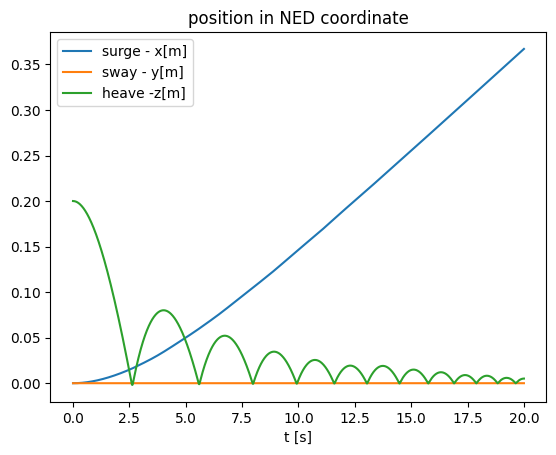

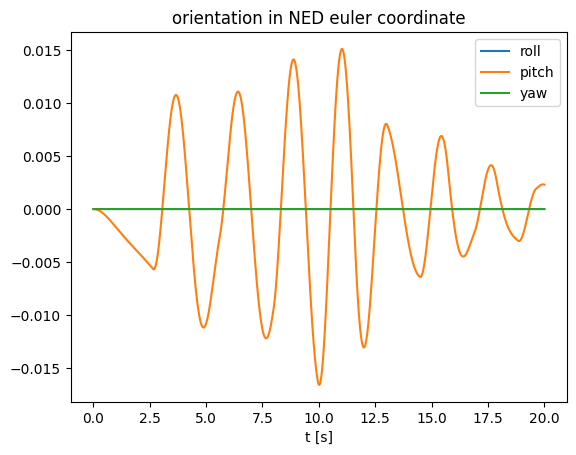

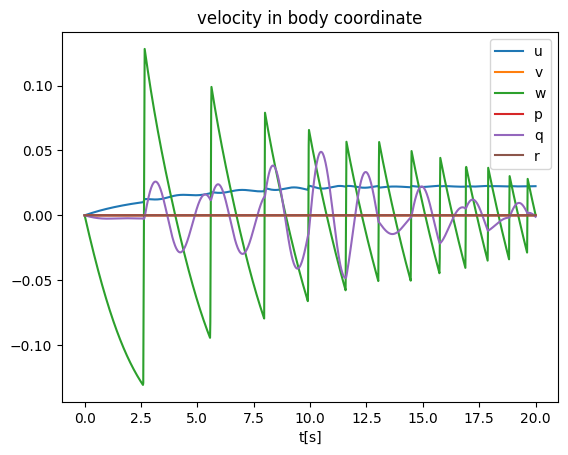

In [6]:
# SIMULATING vehicle on water surface
x0 = np.array([0.0, 0.0, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0]) #x y z r p y u v w p q r
# thru_u.size()
thruster_effort = np.linalg.pinv(blue.thrust_config)@np.array([0.1, 0.0, 0.0, 0.0, 0.0, 0.0])

print(tau_f_Tc(blue.thrust_config, thruster_effort))
# forces
res = sim(x0, thruster_effort, blue.thrust_config, blue.sim_params)
res.T

t = np.linspace(0, blue.T, blue.N+1)

# Create a figure and plot the data
plt.figure()
plt.plot(t, np.concatenate((np.array(x0).reshape((12,1)), res.toarray()), axis=1)[0:3,:].T)
plt.legend(['surge - x[m]', 'sway - y[m]', 'heave -z[m]'])
plt.title("position in NED coordinate")
plt.xlabel('t [s]')

plt.figure()
plt.plot(t, np.concatenate((np.array(x0).reshape((12,1)), res.toarray()), axis=1)[3:6,:].T)
plt.legend(['roll', 'pitch', 'yaw'])
plt.title("orientation in NED euler coordinate")
plt.xlabel('t [s]')

plt.figure()
plt.plot(t, np.concatenate((np.array(x0).reshape((12,1)), res.toarray()), axis=1)[6::,:].T)
plt.legend(['u', 'v', 'w', 'p', 'q', 'r'])
plt.xlabel('t[s]')
plt.title("velocity in body coordinate")
plt.show()

